In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [6]:
heart_df = pd.read_csv('/content/heart.csv')

In [47]:
heart_df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
heart_df['output'].value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [9]:
col_names = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [135]:
scaler = MinMaxScaler()

In [162]:
X = heart_df.drop('output', axis=1)
y = heart_df['output']

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [164]:
scaler.fit(X_train[col_names])

MinMaxScaler()

In [165]:
X_train[col_names] = scaler.transform(X_train[col_names])
X_test[col_names] = scaler.transform(X_test[col_names])

In [84]:
X_train.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,0.270833,1,1,0.265306,0.378753,0,1,0.649123,0,0.000000,2,0,2
202,0.604167,1,0,0.571429,0.321016,0,0,0.201754,1,0.142857,2,0,3
196,0.354167,1,2,0.571429,0.230947,0,1,0.517544,0,0.642857,1,0,2
75,0.541667,0,1,0.418367,0.274827,0,0,0.640351,0,0.250000,1,0,2
176,0.645833,1,0,0.234694,0.228637,1,1,0.631579,1,0.250000,2,2,3


In [145]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [166]:
y_train = y_train.to_numpy().reshape(-1,1)
y_test = y_test.to_numpy().reshape(-1,1)

In [167]:
X_train.shape

(242, 13)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
LR_classifier = LogisticRegression(random_state=4)

In [170]:
LR_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=4)

In [94]:
pred_train = LR_classifier.predict(X_train)

In [171]:
pred_test = LR_classifier.predict(X_test)

In [96]:
from sklearn.metrics import roc_auc_score, RocCurveDisplay, confusion_matrix, accuracy_score, classification_report, roc_curve

In [97]:
confusion_matrix(y_test, pred_test)

array([[25,  4],
       [ 6, 26]])

In [98]:
from sklearn.metrics import ConfusionMatrixDisplay

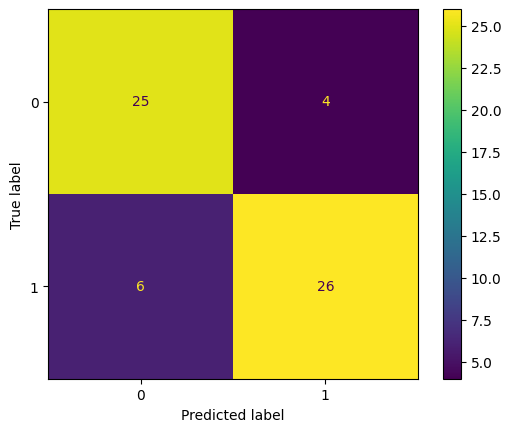

In [99]:
ConfusionMatrixDisplay.from_estimator(LR_classifier, X_test, y_test)

In [172]:
accuracy_score(y_test, pred_test)

0.8524590163934426

In [28]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [29]:
pred_test_scores = LR_classifier.predict_proba(X_test)

In [30]:
pred_test_scores[0,:]

array([0.87042869, 0.12957131])

In [31]:
y_test[0]

array([0])

In [32]:
pred_test_scores

array([[0.87042869, 0.12957131],
       [0.31013512, 0.68986488],
       [0.22418874, 0.77581126],
       [0.95905076, 0.04094924],
       [0.06165432, 0.93834568],
       [0.09308791, 0.90691209],
       [0.48071351, 0.51928649],
       [0.99350002, 0.00649998],
       [0.98239014, 0.01760986],
       [0.6179876 , 0.3820124 ],
       [0.27995432, 0.72004568],
       [0.80341587, 0.19658413],
       [0.11274316, 0.88725684],
       [0.93242116, 0.06757884],
       [0.02353992, 0.97646008],
       [0.07633125, 0.92366875],
       [0.02412262, 0.97587738],
       [0.87592696, 0.12407304],
       [0.9837182 , 0.0162818 ],
       [0.96625778, 0.03374222],
       [0.34074204, 0.65925796],
       [0.97692058, 0.02307942],
       [0.6714987 , 0.3285013 ],
       [0.23941012, 0.76058988],
       [0.08479639, 0.91520361],
       [0.36606781, 0.63393219],
       [0.08125861, 0.91874139],
       [0.53312899, 0.46687101],
       [0.98328881, 0.01671119],
       [0.09043214, 0.90956786],
       [0.

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, pred_test_scores[:,1])

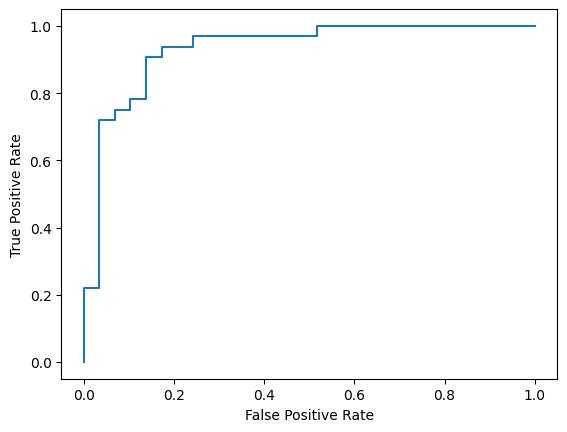

In [34]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.03448276, 0.03448276,
       0.06896552, 0.06896552, 0.10344828, 0.10344828, 0.13793103,
       0.13793103, 0.17241379, 0.17241379, 0.24137931, 0.24137931,
       0.51724138, 0.51724138, 1.        ])

In [36]:
thresholds

array([1.97646008, 0.97646008, 0.92097685, 0.91874139, 0.72004568,
       0.71571957, 0.69449872, 0.68986488, 0.65925796, 0.63393219,
       0.3820124 , 0.3285013 , 0.19658413, 0.15814519, 0.14137465,
       0.0583919 , 0.04683479, 0.00605794])

In [37]:
roc_auc_score(y_test, pred_test_scores[:,1])

0.9310344827586207

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
KNN_classifier = KNeighborsClassifier(n_neighbors=15)

In [40]:
KNN_classifier.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=15)

In [41]:
pred_train = KNN_classifier.predict(X_train)

In [42]:
pred_test = KNN_classifier.predict(X_test)

In [43]:
confusion_matrix(y_test, pred_test)

array([[25,  4],
       [ 2, 30]])

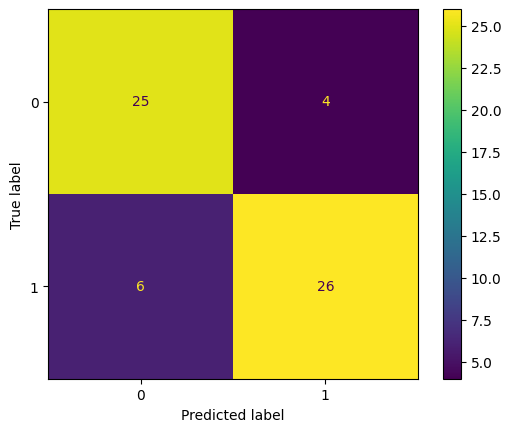

In [44]:
ConfusionMatrixDisplay.from_estimator(LR_classifier, X_test, y_test)

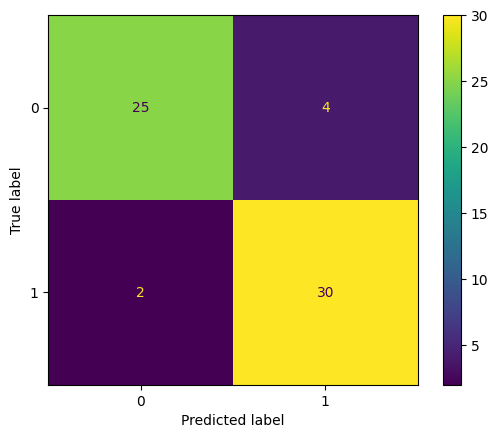

In [45]:
ConfusionMatrixDisplay.from_estimator(KNN_classifier, X_test, y_test)

In [46]:
accuracy_score(y_test, pred_test)

0.9016393442622951

In [48]:
scaler = MinMaxScaler()

In [49]:
X = heart_df.drop('output', axis=1)
y = heart_df['output']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [51]:
from sklearn.model_selection import cross_val_score

In [63]:
scaler.fit(X_train)

MinMaxScaler()

In [64]:
X_train_tr = scaler.transform(X_train)

In [65]:
all_scores=[]
all_k=np.arange(1,33,2)
for k in all_k:
    KNN_classifier = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(KNN_classifier, X_train_tr, y_train, scoring='accuracy')
    all_scores.append(np.mean(scores))

print(all_scores)

[0.7546757164404223, 0.8052790346907994, 0.8285067873303167, 0.8245852187028657, 0.808974358974359, 0.8049773755656109, 0.7894419306184012, 0.7934389140271494, 0.808974358974359, 0.808974358974359, 0.7895927601809956, 0.7817496229260935, 0.7895173453996984, 0.7972850678733032, 0.7932880844645551, 0.793212669683258]


In [66]:
np.argmax(all_scores)

2

In [67]:
all_k[np.argmax(all_scores)]

5

In [107]:
X = heart_df.drop('output', axis=1)
y = heart_df['output']

In [108]:
from sklearn.pipeline import Pipeline

In [115]:
pipe = Pipeline([('my_scaler', MinMaxScaler()), ('LR', LogisticRegression(random_state=4))])

In [116]:
pipe.steps

[('my_scaler', MinMaxScaler()), ('LR', LogisticRegression(random_state=565))]

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('my_scaler', MinMaxScaler()),
                ('LR', LogisticRegression(random_state=565))])

In [119]:
pred_test = pipe.predict(X_test)

In [120]:
accuracy_score(y_test, pred_test)

0.8524590163934426

In [210]:
pipe['my_scaler'].fit(X_train)

MinMaxScaler()

In [173]:
X = heart_df.drop('output', axis=1)
y = heart_df['output']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [175]:
pipe = Pipeline([('my_scaler', MinMaxScaler()), ('myKNN', KNeighborsClassifier())])

In [177]:
all_scores=[]
all_k=np.arange(1,33,2)
for k in all_k:
    pipe.set_params(myKNN__n_neighbors = k)
    scores = cross_val_score(pipe, X_train, y_train, scoring='accuracy')
    all_scores.append(np.mean(scores))

print(all_scores)

[0.7585972850678734, 0.8090497737556561, 0.8323529411764705, 0.8207390648567119, 0.808974358974359, 0.8011312217194572, 0.7855957767722473, 0.7856711915535446, 0.8051282051282052, 0.8051282051282052, 0.7856711915535446, 0.7856711915535445, 0.7895927601809954, 0.7934389140271494, 0.7972096530920061, 0.7815987933634994]


In [178]:
np.argmax(all_scores)

2

In [179]:
all_k[np.argmax(all_scores)]

5

In [184]:
from sklearn.model_selection import GridSearchCV

In [186]:
my_params = {'myKNN__n_neighbors': np.arange(1,33,2)}

In [187]:
my_params

{'myKNN__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])}

In [205]:
my_grid = GridSearchCV(pipe, my_params, scoring='accuracy', verbose=3)

In [206]:
my_grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............myKNN__n_neighbors=1;, score=0.769 total time=   0.0s
[CV 2/5] END ..............myKNN__n_neighbors=1;, score=0.788 total time=   0.0s
[CV 3/5] END ..............myKNN__n_neighbors=1;, score=0.667 total time=   0.0s
[CV 4/5] END ..............myKNN__n_neighbors=1;, score=0.725 total time=   0.0s
[CV 5/5] END ..............myKNN__n_neighbors=1;, score=0.843 total time=   0.0s
[CV 1/5] END ..............myKNN__n_neighbors=3;, score=0.846 total time=   0.0s
[CV 2/5] END ..............myKNN__n_neighbors=3;, score=0.846 total time=   0.0s
[CV 3/5] END ..............myKNN__n_neighbors=3;, score=0.765 total time=   0.0s
[CV 4/5] END ..............myKNN__n_neighbors=3;, score=0.745 total time=   0.0s
[CV 5/5] END ..............myKNN__n_neighbors=3;, score=0.843 total time=   0.0s
[CV 1/5] END ..............myKNN__n_neighbors=5;, score=0.846 total time=   0.0s
[CV 2/5] END ..............myKNN__n_neighbors=5;

GridSearchCV(estimator=Pipeline(steps=[('my_scaler', MinMaxScaler()),
                                       ('myKNN',
                                        KNeighborsClassifier(n_neighbors=31))]),
             param_grid={'myKNN__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31])},
             scoring='accuracy', verbose=3)

In [207]:
print(my_grid.best_params_)

{'myKNN__n_neighbors': 5}


In [208]:
print(my_grid.best_score_)

0.8323529411764705
